##### AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
    <h1 style = "font-size:48px; font-weight:normal"><b>AI</b>-TECH</style></h1>
    <br>
<br>
<br>
<br>
    <h1 style = "font-size:24px; font-weight:normal">Przykład 4 DO LABORATORIUM 2</style></h1>
    <h1 style = "font-size:24px">z UCZENIA MASZYNOWEGO</style></h1>
    <h1 style = "font-size:24px">Klasyfikacja nadzorowana</style></h1>
    <h1 style = "font-size:24px">Szymon Zaporowski</style></h1>
    <h3 style = "font-size:21px">Porównanie klasyfikatorów na przykładzie danych syntetycznych</h3>
    <h3 style = 
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
    </body>
    </html>

![stopka.svg](stopka.svg)

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego 
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej" 
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>


# Przykład 4 : Porównanie klasyfikatorów



Ten przykład przedstawia porównanie kilku klasyfikatorów zaimplementowanych w ramach pakietu scikit-learn z wykorzystaniem syntetycznych zbiorów danych. Przykład ilustruje naturę granic decyzyjnych różnych klasyfikatorów. Należy mieć na względzie fakt, iż są to generowane sztucznie zbiory danych i taki układ może niekoniecznie przenosić się na rzeczywiste dane. To przedstawienie granic służy do pokazania procesu klasyfikacji dla różnych klasyfikatorów i porównania sposobu ich działania na tych samych danych. 


Wykresy przedstawiają punkty treningowe z wykorzystaniem jednolitych kolorów, natomiast punkty testowe są reprezentowane jako półprzezroczyste. W prawym dolnym rogu przedstawiona została miara dokładności klasyfikacji z użyciem zbioru testowego. 





In [1]:
#Import niezbędnych bibliotek

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
% matplotlib inline


In [4]:
# Inicjalizacja klasyfikatorów oraz syntezowania danych


names = ["Regresja Logistyczna", "SVM z jądrem liniowym", "SVM z jądrem RBF", "SVM z jądrem wielomianowym",
         "Drzewo Decyzyjne", "Klasyfikator Random Forest", "Regresja Logistyczna", "OVR", 'poly deg 2', 'rdf']

classifiers = [
    LogisticRegression(solver='newton-cg', random_state=0),  #Regresja
    SVC(kernel="linear", C=0.025),  #SVM
    SVC(gamma=2, C=100),  #SVM
    SVC(kernel="poly", degree=3, gamma=2, C=1),  #SVM
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    SVC(kernel="poly", degree=2, gamma=2, C=1),  #SVM
    SVC(kernel="rdf", C=0.025),  #SVM
]

#tworzenie losowych danych
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(3)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
print("Dataset:", datasets)

Dataset: [(array([[ 0.03159499,  0.98698776],
       [ 2.11509784, -0.04624397],
       [ 0.88248972, -0.07575606],
       [-0.0551441 , -0.03733246],
       [ 0.82954503, -0.53932149],
       [ 2.11285708,  0.66208353],
       [ 0.5696927 ,  0.33744136],
       [ 0.95217454, -0.75307471],
       [-0.02922115,  0.39287336],
       [ 1.71579557,  0.36069454],
       [-0.27883014,  0.61420539],
       [ 2.00344509, -0.3091496 ],
       [ 1.50009616, -0.74636376],
       [ 1.22540835,  1.19793017],
       [ 0.46730819,  0.54703192],
       [-0.36653222,  1.11971633],
       [ 0.30124459,  1.23315697],
       [ 0.30430746,  0.82373935],
       [-0.23712492,  0.77876034],
       [ 1.16339832,  0.55290238],
       [-0.59702417,  0.6572361 ],
       [ 0.46356735, -0.1951543 ],
       [ 0.68451111,  0.75287685],
       [ 0.70515699, -0.45892444],
       [-0.65805008, -0.12944211],
       [-0.74662946, -0.3829632 ],
       [ 0.60585226,  0.31252842],
       [ 2.18137168, -0.02291747],
       [ 

Zilustrujmy przykładowe porównanie klasyfikatorów typu SVM, Regresja Logistyczna oraz Drzew Decyzyjnych.
Po lewej stronie wykresu znajdują się wygenerowane dane, poźnmiej pojawiają sie kolejne klasyfikatory. 
Dane treningowe zostały zaznaczone z wyraźną czerwoną obwódką, natmoast dane testowe są delikatnie przezroczyste.

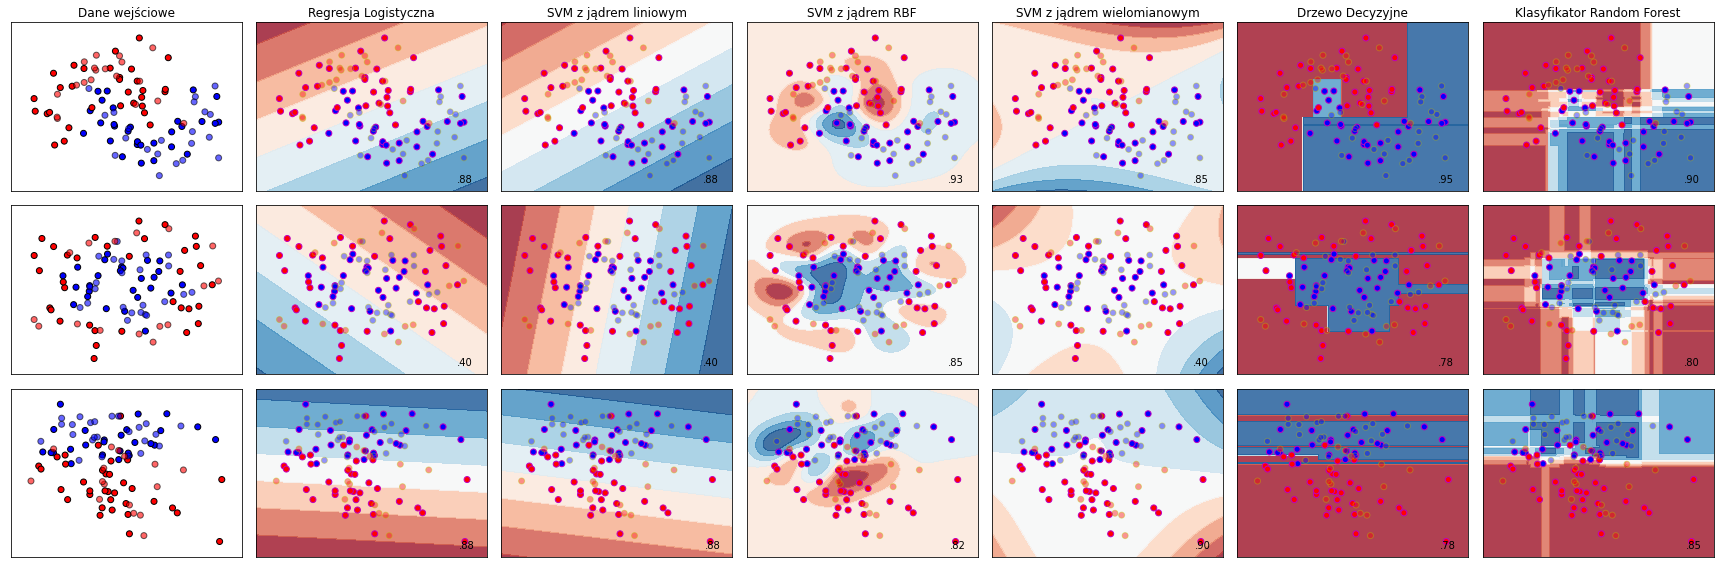

In [3]:

figure = plt.figure(figsize=(24, 8))
i = 1
h = .01  # ustawienie rozmiaru siatki na wykresie
# iteracja po datasetach
for ds_cnt, ds in enumerate(datasets):
    # preprocesing danych, podział na dane testowe i treningowe
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test =
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Rysowanie zbioru danych
cm = plt.cm.RdBu  #YlGnBu#RdBu ##FF0000', '#0000FF'
cm_bright = ListedColormap(['#FF0000', '#0000FF'])  #00FF00', '#0000FF'])
ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

if ds_cnt == 0:
    ax.set_title("Dane wejściowe")
# Rysowanie punktów należacych do zbioru trengowego
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Rysowanie punktów należacych do zbioru testowego
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

# Iteracja po klasyfikatorach
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Rysowanie granic decyzyjnych. W tym celu następuje przypisanie do każdego punktu na siatce [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Wstawianie rezultatów klasyfikacji na wykres
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Rysowanie punktów należacych do zbioru treningowego
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='m')
    # Rysowanie punktów należacych do zbioru testowego
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='y', alpha=0.4)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=10, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

<p><b>Zadanie 1</b></p>

Wykorzustując wiedze z poprzednich zadań i powyższy przykład dodaj kilka modeli SVM posiadających różne nastawy oraz klasyfikatorów oparych o algorytm Random Forest. Jakie różnice widać pomiędzy poszczególnymi klasyfikatorami? Które klasyfikatory i z jakimi nastawami radzą sobie najlepiej?
<p><b>Zadanie 2</b></p>

Analizując różne sposoby rozmieszczenia danych na płaszczyźnie jakich klasyfiaktorów użyjesz do:

>a) Danych, gdzie klasy są od siebie dosyć wyraźnie odseparowane?

>b) Danych, gdzie nie można w prosty sposób odseparować od siebie klas?

Odpowiedź uzasadnij bazując na przebiegu laboratorium.